In [1]:
#
#    IMPORTANT: RUN JUPYTER NOTEBOOK IN "am4ip" ROOT FOLDER (NOT THE ONE IN SRC FOLDER)
#
import os
import sys
import torch
import requests
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
from IPython.display import HTML, display

sys.path.append("../../src")

from am4ip.utils import expanded_join

In [2]:
%%bash
export CUDA_VISIBLE_DEVICES=0

# Advanced Methods for Image Processing (and Computer Vision)
---------

## Introduction + Course 1

# Introduction
----

##  What is this course about?

## Image processing VS computer vision

## Course content

# What is this course about?
---------

> <span style="color:#09bb5a">**Advanced Methods**</span> for <span style="color:#09bb5a">**Image Processing**</span> (and <span style="color:#09bb5a">**Computer Vision**</span>)

### Advanced methods
- What we will do:
    - (Advanced) Statistical Learning
    - (Advanced) Machine Learning
    - (Advanced) Deep Learning
- What we won't:
    - Low-level filtering (median, gaussian, etc.)
    - Basic machine learning (K-means, K-NN)


### What I suppose you (should) know:
- Basic linear algebra (vectors and matrices, distance, scalar/dot product, ...)
- Basic probability (distributions, expectation, ...)

## Image Processing VS Computer Vision
---------

<table>
    <tr>
        <th scope="col"></th>
        <th scope="col">Image Processing</th>
        <th scope="col">Computer Vision</th>
    </tr>
    <tr>
        <th scope="row">Goal</th>
        <td>Enhancing</td> 
        <td>Understanding</td>
    </tr>
    <tr>
        <th scope="row">Processing Level</th>
        <td>Low</td> 
        <td>High</td>
    </tr>
    <tr>
        <th scope="row" style="width:10%">Application Examples</th>
        <td style="width:20%">Correcting illumination, adjusting tones, enhancing contrast, ...</td> 
        <td style="width:20%">Detecting people, localizing objects, tracking vehicles, ...</td>
    </tr>
</table>
<!-- <table style="margin-left:auto;margin-right:auto">
    <tr>
        <th scope="col"></th>
        <th scope="col">Image Processing</th>
        <th scope="col">Computer Vision</th>
    </tr>
    <tr>
        <th scope="row">Goal</th>
        <td>Enhancing</td> 
        <td>Understanding</td>
    </tr>
    <tr>
        <th scope="row">Processing Level</th>
        <td>Low</td> 
        <td>High</td>
    </tr>
    <tr>
        <th scope="row" style="text-align:center;width:10%">Application Examples</th>
        <td style="text-align:center;width:20%">Correcting illumination, adjusting tones, enhancing contrast, ...</td> 
        <td style="text-align:center;width:20%">Detecting people, localizing objects, tracking vehicles, ...</td>
    </tr>
</table>
 -->

## What will we do?
- Image Processing
    - Image Quality Assessment (Course 1 & 2)
    - Denoising (Course 4)
- Computer Vision
    - Image generation  (Course 3)
    - Semantic Segmentation  (Course 5 & 6)

# Course materials
---

> All the sources are available on my gitlab ([gitlab.com/pierre-jacob/am4ip](https://gitlab.com/pierre-jacob/am4ip))

- Slides are built on top of Jupyter Notebook with RISE extension (online code running for demos)
- All functions / code snippets are provided to you to re-run every course examples
- PDF version (static files) will be available on Moodle

# Image Quality Assessment

---------

### I.   What is image quality?
### II.  How to measure human quality perception?
### III. How to measure quantitatively (and computationaly) the quality of images?

# I. What is Image Quality?
---

### 1.  Definition

### 2. Applications

### 3.  Criterias

# Definition of Image Quality
---------

<fieldset class="definition">
<legend class="definition">Definition: Image Quality</legend>
Level of accuracy with which different imaging systems capture, process, store, compress, transmit and display the signals that form an image.
</fieldset>

1. <span style="color:#09bb5a"><b>Optical</b></span> problem: how photons are captured by the sensor (field of view, working distance, lens properties, exposure time, ...)  ?

2. <span style="color:#09bb5a"><b>Hardware</b></span> problem: What are the sensor properties (spatial resolution, color resolution, dynamic range, wavelength range, ...) ?

3. <span style="color:#09bb5a"><b>Compression</b></span> problem: How to store pixel information (raw, lossless compression, lossy compression, ...) ?

4. <span style="color:#09bb5a"><b>Transmission</b></span> problem: How to send large amount of data efficiently (progressive showing, HD videos, ...) ?

5. <span style="color:#09bb5a"><b>Display</b></span> problem: How the screen's properties modify an image (spatial and color resolution, dynamic range, illumination, ...) ?

# Why Image Quality Assessment is important?
---------

## Real-World Applications
- **On-demand videos** → Adjust video encoding (and compression) depending on the targeted device (4k screen VS smartphone)
- **Event promotion** → Low-quality content might deserve companies and/or people
- **Image generation** → Low-quality content can be filtered out before being shown to the user
- **Semi-automatic image editing** → Remove a person from a photo and generate an artificial background. Is the result of good quality?
- **Video game enhanced quality** → Nvidia DLSS (Deep Learning Super-Sampling) and DLAA (Deep Learning Anti-Aliasing)

# Human Quality Perception
---------

- Without criterias, it is unclear how to quantify quality
    - What are good criterias?
- How to scale it to videos, social medias, ... ?
    - How to replace (subjective) human evaluation by objective quality metrics?

# Quality criterias
---------


> Criterias are <span style="color:#09bb5a"><b>task-dependent</b></span>.

- <span style="color:#09bb5a"><b>Realism</b></span>
    - Human face generation → which model has the most realistic face (symmetry, artefacts in the hair, eye color, ...)?
    - Anime character generation → which model has the most plausible character? (correct number of arms/legs/fingers, color of the clothes, ...)?


- <span style="color:#09bb5a"><b>Aestetics</b></span>
    - Landscape generation → which scene is the most beautiful? Are colors harmonious?

- <span style="color:#09bb5a"><b>Impairment assessment</b></span>
    - Study of lossy compression algorithm → Is the quality of the compressed image good compared to the raw one?
    - Super-resolution → Does the high resolution image have artefacts (false color added, hallucinated shapes, ...?

- <span style="color:#09bb5a"><b>Artefact Visibility</b></span>
    - Where artefacts are visible?

# How to Measure Human Quality Perception?
---

### 1. Human Image Quality Perception

### 2. How to correlate IQ metrics with human quality perception?

# Subjective Image Quality Assessment
---

- What is the best way to evaluate **human** perception of quality? Ask people
    - Rely on many different people → reduce inter-user variance
    - Train them first by giving a few examples → reduce intra-user variance
- What quantity should be measured? <span style="color:#09bb5a"><b>Mean Opinion Scores (MOS)</b></span>
    -  1 Grade per image
        - Example: 5 categories to grade IQ → "Bad", "Poor", "Fair", "Good", "Excellent"
    - <span style="color:#09bb5a"><b>Ranking-based</b></span> → Rank a bunch of images from lowest quality to highest and average ranks
    - <span style="color:#09bb5a"><b>Pairwise annotations</b></span> → Given a reference and 2 distorded images, select the one closer to the reference


## Human Quality Perception
---

Lets play a game → Which image (left or right) do you consider the most visually similar to the middle one?

<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I05_17_04.png" width="100%"><figcaption><center>1</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I05.png" width="100%"><figcaption><center>Reference</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I05_04_02.png" width="100%"><figcaption><center>2</center></figcaption></figure></td>
    </tr>
</table>



## Human Quality Perception
---

Lets play a game → Which image (left or right) do you consider the most visually similar to the middle one?

<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I06_04_02.png" width="100%"><figcaption><center>1</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I06.png" width="100%"><figcaption><center>Reference</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I06_11_03.png" width="100%"><figcaption><center>2</center></figcaption></figure></td>
    </tr>
</table>



## Human Quality Perception
---

Lets play a game → Which image (left or right) do you consider the most visually similar to the middle one?

<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_06_04.png" width="100%"><figcaption><center>1</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07.png" width="100%"><figcaption><center>Reference</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_10_03.png" width="100%"><figcaption><center>2</center></figcaption></figure></td>
    </tr>
</table>


# Corrected Opinion Scores
---

- Single grade per image
    - Unreliable if annotators are not experts
    - Train them → costly
- Ranking-based and pairwise annotations
    - More reliable even with untrained annotators
    - Require a larger number of human evaluation
    - **Scores are not per-image**

> Solution for pairwise annotations: generate per-image scores according to some distribution

# Example of pair-wise annotation methods
---

- <span style="color:#09bb5a"><b>Just Noticeable Difference (JND)</b></span>
    - Compare a reference image and a distorted version
    - If they are the same (no noticeable difference) give a score of 1, otherwise 0
- <span style="color:#09bb5a"><b>Two Alternative Forced Choice (2AFC)</b></span>  
    - Give a reference image and two distorted versions
    - Select the distorted version the most similar to the reference and give a score of 1, the second gets 0

# Scaling methods for pairwise annotations (2)
---

- <span style="color:#09bb5a"><b>Swiss Rating System</b></span>
    - Non-eliminating tournament with a fixed number of rounds, paired by similar scores
    - Show pairs of distorted images and select the one with the highest quality, give it 1pt, and give 0pt to the other
- <span style="color:#09bb5a"><b>Elo system</b></span>
    - Same as the Swiss rating system except the way of giving rating
    - Rating increasing (or decreasing) is based on a probability distribution (how probable are you to win this game)
    - High probability to win → few points in case of victory, or huge loss of point in case of defeat

# How to correlate IQ metrics  with human perception?
----

1. Recrut a bunch a people to get subjective scores
3. Compute your metric for each image
4. Correlate MOS with your metric

> Ideally, we want a <span style="color:#09bb5a"><b>linear correlation</b></span> between the objective metric and the Mean Opinion Scores.

# Correlation
---

In [3]:
sigma = 1.0; N = 100; x = np.linspace(start=0., stop=15., num=N)
y_linear = x + 2. + np.random.normal(loc=0., scale=sigma, size=N)
y_log = 2. * np.log(x + 0.01) + 10 + np.random.normal(loc=0., scale=sigma, size=N)
y_cloud = np.random.uniform(0., 15., size=N)   

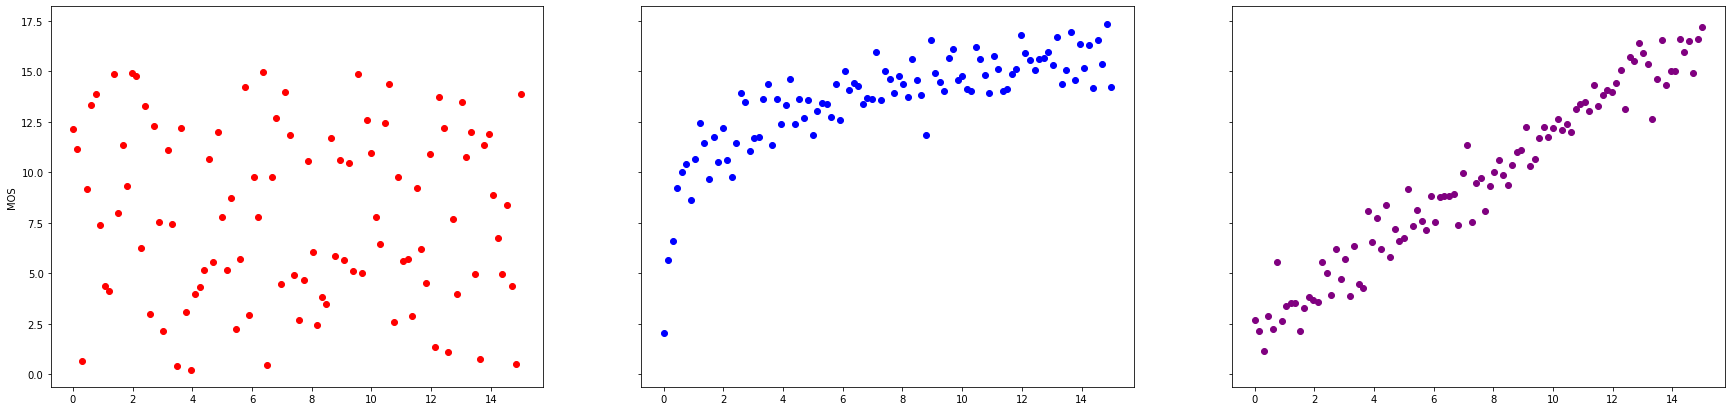

In [4]:
fig = plt.figure(figsize=(30, 7))
ax = fig.subplots(1, 3, sharey=True) ; ax[0].set_ylabel('MOS')
ax[0].scatter(x, y_cloud, c='red'); ax[1].scatter(x, y_log, c='blue'); ax[2].scatter(x, y_linear, c='purple');

# How to measure Linear correlation?
---

- <span style="color:#09bb5a"><b>Pearson Correlation Coefficient</b></span>

$$\begin{align}
\rho_{XY} = \frac{\text{cov}\left(X, Y\right)}{\sigma_X \sigma_Y}\end{align}$$

where:
- $\text{cov}\left(X, Y\right)$ = cross-covariance between X and Y
- $\sigma_X$: standard deviation of X


<center><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/pearson_cc.png" width="50%"></figure></center>

# Pearson Correlation Coefficient
---

<center><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/pearson_cc_2.svg" width="100%"></figure></center>

# Pearson Correlation Coefficient in practice
---

- Compute mean of X and Y named $\mu_X$ and $\mu_Y$
$$\begin{align}
\mu_X = \frac{1}{N}\sum_{i=1}^N x_i \quad\quad \mu_Y = \frac{1}{N}\sum_{i=1}^N y_i
\end{align}$$

- Compute cross-covariance between X and Y:
$$\begin{align}\text{cov}\left(X, Y\right) = \frac{1}{N}\sum_{i=1}^N (x_i-\mu_X)(y_i-\mu_Y)\end{align}$$

- Compute standard deviation for X and Y:
$$\begin{align}
\sigma_X = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i-\mu_X)^2} \quad\quad \sigma_Y = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i-\mu_Y)^2}
\end{align}$$

# Let's come back to our example...
---

In [5]:
def pearson_cc(X, Y):
    mean_X = np.mean(X)
    mean_Y = np.mean(Y)
    
    cov_XY = np.mean((X - mean_X)*(Y - mean_Y))  
    std_X = np.sqrt(np.mean((X - mean_X) ** 2))
    std_Y = np.sqrt(np.mean((Y - mean_Y) ** 2))
    
    return cov_XY / (std_X * std_Y)

Pearson(y_cloud, x) = -0.0746
Pearson(y_log, x) = 0.7784
Pearson(y_linear, x) = 0.9768


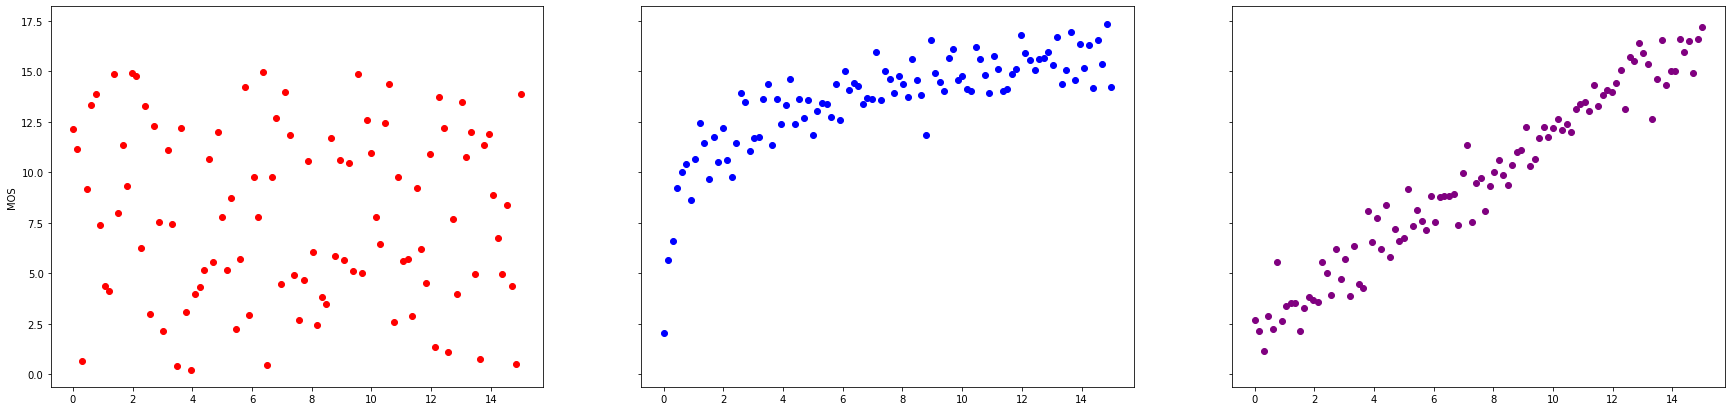

In [6]:
fig = plt.figure(figsize=(30, 7))
ax = fig.subplots(1, 3, sharey=True) ; ax[0].set_ylabel('MOS')
ax[0].scatter(x, y_cloud, c='red'); ax[1].scatter(x, y_log, c='blue'); ax[2].scatter(x, y_linear, c='purple');

print(f"Pearson(y_cloud, x) = {pearson_cc(y_cloud, x):1.4f}")
print(f"Pearson(y_log, x) = {pearson_cc(y_log, x):1.4f}")
print(f"Pearson(y_linear, x) = {pearson_cc(y_linear, x):1.4f}")

# What about non-linear correlation?
---

- <span style="color:#09bb5a"><b>Spearman Rank Correlation</b></span>
    - It assesses how well the relationship between two variables can be described using a **monotonic function**.
    - Mathematically: Pearson correlation between the rank of X and the rank of Y
<table>
    <tr>
        <td width="40%"><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/Spearman_inc.svg" width="75%"><figcaption><center>Monotonically increasing</center></figcaption></figure></td>
        <td width="40%"><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/Spearman_dec.svg" width="75%"><figcaption><center>Monotonically decreasing</center></figcaption></figure></td>
    </tr>
</table>

# Spearman correlation VS Pearson correlation
---

<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/SvsP_cloud.svg" width="100%"><figcaption><center>No correlation</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/SvsP_mono_inc.svg" width="100%"><figcaption><center>Monotonically Increasing</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/SvsP_outliers.svg" width="100%"><figcaption><center>Outliers</center></figcaption></figure></td>
    </tr>
</table>

# Spearman rank correlation in practice
---

- There exists 2 formulas in practice:
    1. Based on Pearson coefficient (most generic)
    2. A faster one which supposes that the ordering is unique
- The 1st one is the Pearson correlation between the ranks of X, and the ranks of Y, noted $R(X)$ and $R(Y)$
$$\begin{align}
    s_{XY} = \frac{\text{cov}(R(X), R(Y))}{\sigma_{R(X)} \sigma_{R(Y)}}
\end{align}$$

# Spearman rank correlation in practice (2)
---

In [7]:
def spearman_v1(X, Y):
    order_X = np.argsort(X)
    rank_X = np.zeros_like(X)
    rank_X[order_X] = np.arange(len(X))
    
    order_Y = np.argsort(Y)
    rank_Y = np.zeros_like(Y)
    rank_Y[order_Y] = np.arange(len(Y))

    return pearson_cc(rank_X, rank_Y)

Pearson(y_cloud, x)  = -0.0746 	|	 Spearman(y_cloud, x)  = -0.0703
Pearson(y_log, x)    = 0.7784 	|	 Spearman(y_log, x)    = 0.8381
Pearson(y_linear, x) = 0.9768 	|	 Spearman(y_linear, x) = 0.9782


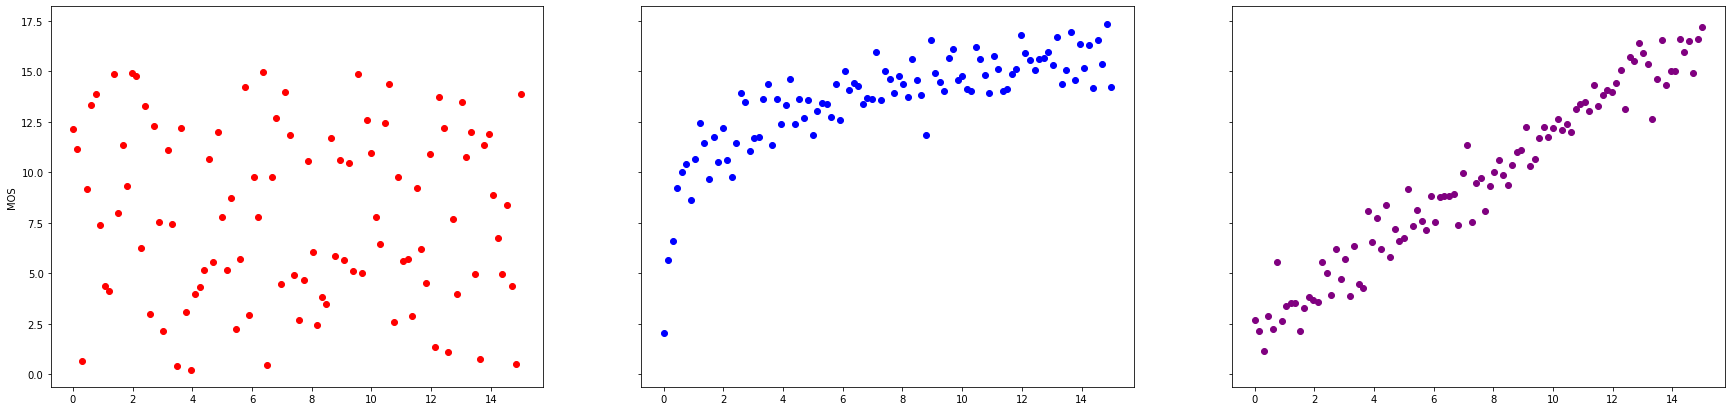

In [8]:
fig = plt.figure(figsize=(30, 7))
ax = fig.subplots(1, 3, sharey=True) ; ax[0].set_ylabel('MOS')
ax[0].scatter(x, y_cloud, c='red'); ax[1].scatter(x, y_log, c='blue'); ax[2].scatter(x, y_linear, c='purple');

print(f"Pearson(y_cloud, x)  = {pearson_cc(y_cloud, x):1.4f} \t|\t Spearman(y_cloud, x)  = {spearman_v1(y_cloud, x):1.4f}")
print(f"Pearson(y_log, x)    = {pearson_cc(y_log, x):1.4f} \t|\t Spearman(y_log, x)    = {spearman_v1(y_log, x):1.4f}")
print(f"Pearson(y_linear, x) = {pearson_cc(y_linear, x):1.4f} \t|\t Spearman(y_linear, x) = {spearman_v1(y_linear, x):1.4f}") 

# Spearman rank correlation in practice (3)
---
- The 2nd one is computed as follows:
$$\begin{align}
    s_{XY} = 1 - \frac{6}{N(N^2-1)} \sum_{i=1}^N (R(x_i) - R(y_i))^2
\end{align}$$

In [9]:
def spearman_cc_v2(X, Y):
    order_X = np.argsort(X)
    rank_X = np.zeros_like(X)
    rank_X[order_X] = np.arange(len(X))
    
    order_Y = np.argsort(Y)
    rank_Y = np.zeros_like(Y)
    rank_Y[order_Y] = np.arange(len(Y))

    spearman = 1 - 6 * np.sum((rank_X - rank_Y) ** 2) / (len(X) * (len(X) ** 2 - 1))
    return spearman

# An Image Processing approach to Image Quality Assessment
---------
##

<center>How to <span style="color:#09bb5a"><b>objectively</b></span> and <span style="color:#09bb5a"><b>computationaly</b></span> measure image quality? </center>

## The three ways of IQA
## Overview of different approaches
## How do IQ metrics correlate with human perception?

# The three ways of Image Quality Assessment
----

There exists 3 families of IQA algorithm:

- <span style="color:#09bb5a"><b>Full Reference</b></span> (FR IQA)
    - Have access to the original (reference) image
- <span style="color:#09bb5a"><b>Reduced Reference</b></span> (RR IQA)
    - Have access to features extracted from the reference image
- <span style="color:#09bb5a"><b>No Reference</b></span> (NR IQA)
    - Only the target image is available

# How to measure quantitatively (and computationaly) the quality of images?
---

## Classical Full-reference IQ metrics
## Learning-based Full-reference IQ metrics
## Distribution-based NR IQ metrics

# Peak Signal-to-Noise Ratio (PSNR)
----

<fieldset class="definition">
<legend class="definition">Definition: PSNR</legend>
<b>PSNR (Peak Signal to Noise Ratio)</b> is:
<ul>
    <li><b>Full-reference</b> distorsion measure between the maximum possible power of a signal and the power of corrupting noise that affect the fidelity of its representation</li>
    <li>Expressed in decibel (dB)</li>
    <li>Computed pixel-wise</li>
    <li>Suppose to have the two images <b>aligned</b></li>
</ul>

$$\begin{align}
    & \text{PSNR}(\mathcal{I}, \mathcal{I}_\text{ref}) = 10 \cdot \log_{10}\left(\frac{\text{MAX}^2_\mathcal{I}}{\text{MSE}(\mathcal{I}, \mathcal{I}_\text{ref})}\right) \\ \text{where} \quad & \text{MSE}(\mathcal{I}, \mathcal{I}_\text{ref}) = \frac{1}{HW} \sum_{i=1}^H \sum_{j=1}^W \left(\mathcal{I}(i,j) - \mathcal{I}_\text{ref}(i,j)\right)^2 \\ \text{and} \quad & \text{MAX}_\mathcal{I} = 255 \end{align}$$
    
<!-- $$\begin{align}\dotp{\vx}{\vy}\end{lalign}$$ -->
</fieldset>



<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_06_04.png" width="100%"><figcaption><center>1</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07.png" width="100%"><figcaption><center>Reference</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_10_03.png" width="100%"><figcaption><center>2</center></figcaption></figure></td>
    </tr>
</table>

In [10]:
def calc_psnr(I, I_ref):
    return 10. * torch.log10(255**2 / torch.mean(torch.square(I - I_ref)))

In [11]:
I_ref = Image.open(expanded_join("../../resources/iqa/I07.png"))
I_1 = Image.open("../../resources/iqa/I07_06_04.png")
I_2 = Image.open("../../resources/iqa/I07_10_03.png")

I_ref = torch.from_numpy(np.array(I_ref, dtype=np.float64)).cuda()
I_1 = torch.from_numpy(np.array(I_1, dtype=np.float64)).cuda()
I_2 = torch.from_numpy(np.array(I_2, dtype=np.float64)).cuda()

In [12]:
psnr_1 = calc_psnr(I_1, I_ref)
psnr_2 = calc_psnr(I_2, I_ref)

print(f"PSNR(I_1, I_ref) = {psnr_1:.2f} dB\nPSNR(I_2, I_ref) = {psnr_2:.2f} dB")

PSNR(I_1, I_ref) = 22.92 dB
PSNR(I_2, I_ref) = 32.46 dB


# How PSNR is correlated to human vision?
----

In [13]:
%%capture
# above magic command hide output
# Pre-computed PSNR from dataset:
N_image = 25
N_distortion = 24
N_params = 5
tid2013 = "C:\\RESOURCES\\datasets\\tid2013"

psnr = []
with open(tid2013 + "\\metrics_values\\PSNRc.txt") as f:
    for line in f:
        psnr.append(float(line))
psnr = np.array(psnr, dtype=np.float32)

mos = []
with open(tid2013 + "\\mos.txt") as f:
    for line in f:
        mos.append(float(line))
mos = np.array(mos, dtype=np.float32)

def draw_figure(x, y, c, xlim=(0, 1), xlabel=""):
    fig = plt.figure(figsize=(20, 15));
    plt.xlim(xlim);
    plt.xlabel(xlabel, fontsize=40, color='#09bb5a');
    plt.ylabel("Mean Opinion Scores (MOS)", fontsize=40, color='#09bb5a');
    plt.xticks(fontsize=20, color='#09bb5a')
    plt.yticks(fontsize=20, color='#09bb5a')
    plt.scatter(x, y, c=c, cmap="tab20")
    plt.show()


In [14]:
psnr_lcc = pearson_cc(psnr, mos)
psnr_srcc = spearman_v1(psnr, mos)
psnr_srcc_2 = spearman_cc_v2(psnr, mos)

Pearson(PSNR, MOS) = 0.6601
Spearman(PSNR, MOS) = 0.6869


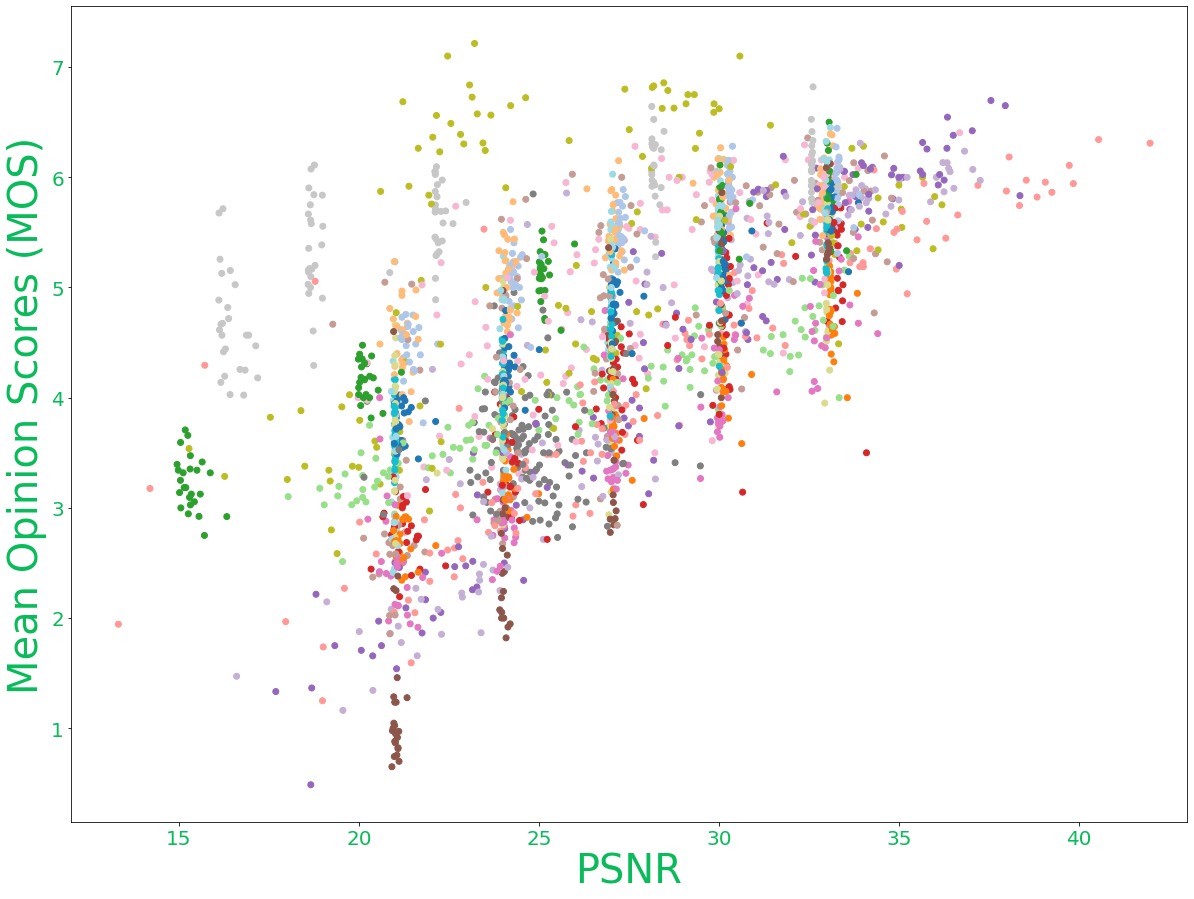

In [15]:
#colors = np.array(list(range(1, N_params + 1)) * (N_distortion * N_image)).flatten()  # 1 color / parameter 
colors = np.array([[i] * N_params for i in range(N_distortion)] * N_image).flatten()  #1 color / distortion
idx = np.where(colors < 20)[0] # Reminder: only 20 different colors
# idx = np.where(np.logical_or(colors == 9, colors == 10))[0]
# idx = range(len(colors))
print(f"Pearson(PSNR, MOS) = {pearson_cc(psnr, mos):1.4f}")
print(f"Spearman(PSNR, MOS) = {spearman_v1(psnr, mos):1.4f}")
draw_figure(psnr[idx], mos[idx], colors[idx], xlim=(12, 43), xlabel="PSNR")

Interesting classes to look at:
- idx==20 (Lossy compression of noisy images)
- idx==14 (Local block-wise distortions of different intensity)

# TID2013: Type of distortion
----

|N | Type of distortion|
|--|:-----------------:|
|1 |     Additive Gaussian noise (luminance only)|
|2 |      Additive Gaussian noise in color components|
|3 |      Spatially correlated noise|
|4 |      Masked noise|
|5 |      High frequency noise|
|6 |      Impulse noise|
|7 |      Quantization noise|
|8 |      Gaussian blur|
|9 |      Image denoising|
|10|      JPEG compression|
|11|      JPEG2000 compression|
|12|      JPEG transmission errors|
|13|      JPEG2000 transmission errors|
|14|      Non eccentricity pattern noise|
|15|      Local block-wise distortions of different intensity|
|16|      Mean shift (intensity shift)|
|17|      Contrast change|
|18|      Change of color saturation|
|19|      Multiplicative Gaussian noise|
|20|      Comfort noise|
|21|      Lossy compression of noisy images|
|22|      Image color quantization with dither|
|23|      Chromatic aberrations|
|24|      Sparse sampling and reconstruction|

# Another Metric: Structural Similarity
----

<fieldset class="definition">
<legend class="definition">Definition: SSIM (generic formulation)</legend>
<p><b> (mean) SSIM (Structural Similarity)</b></p>
<ul>
    <li><b>Full-reference</b> measure</li>
    <li><b>Main idea: Neighborhoods are strongly correlated</b></li>
    <li>Three terms: <b>luminance</b> masking, <b>contrast</b> masking, and <b>structure</b> comparison</li>
    <li>The two images are supposed to be <b>aligned</b></li>
</ul>
    
$$\text{SSIM}(\mathcal{I}, \mathcal{I}_\text{ref}) = \frac{1}{HW} \sum_{i=1}^H \sum_{j=1}^W l_{\mathcal{I}, \mathcal{I}_\text{ref}}^\alpha(i,j) \cdot c_{\mathcal{I}, \mathcal{I}_\text{ref}}^\beta(i,j) \cdot s_{\mathcal{I}, \mathcal{I}_\text{ref}}^\gamma(i,j)$$

<!-- $$\begin{gather}
    l(\mathcal{I}, \mathcal{I}_\text{ref}) = \frac{\mu_\mathcal{I} \mu_{\mathcal{I}_\text{ref}} + C_1}{\mu_\mathcal{I}^2 + \mu_{\mathcal{I}_\text{ref}}^2 + C_1} & c(\mathcal{I}, \mathcal{I}_\text{ref}) = \frac{\sigma_\mathcal{I} \sigma_{\mathcal{I}_\text{ref}} + C_2}{\sigma_\mathcal{I}^2 + \sigma_{\mathcal{I}_\text{ref}}^2 + C_2} & s(\mathcal{I}, \mathcal{I}_\text{ref}) = \frac{\sigma_{\mathcal{I}, \mathcal{I}_\text{ref}} + C_3}{\sigma_\mathcal{I} \ \sigma_{\mathcal{I}_\text{ref}} + C_3}
\end{gather}$$   -->
</fieldset>


In [16]:
def per_pixel_ssim(I, I_ref, r=5, sigma=1.5, max_value=255., k_1=0.01, k_2=0.03):  # I.size() = I_ref.size() = (H, W, C)
    # Input images have shape (H, W, C). We transform them to respect torch convention (N x C x H x W)
    images = torch.permute(torch.concat([I[None, ...], I_ref[None, ...]], dim=0), (0, 3, 1, 2))  # shape = 2 x 3 x H x W
    gaussian_filter_1d = torch.exp(-0.5*(torch.arange(-r, r+1, device=I.device, dtype=I.dtype)/sigma)**2)

    # torch implemented conv2d using groups, so syntax is a bit harder: we have 3 inputs and need 1 convolution applied to each input.
    # => group = channel number (3)
    # => output / group number = 1
    gaussian_filter_2d = gaussian_filter_1d.view(-1, 1) * gaussian_filter_1d.view(1, -1)
    gaussian_filter_2d = (gaussian_filter_2d / gaussian_filter_2d.sum()).view(1, 1, 2*r+1, 2*r+1).repeat((I.size(-1), 1, 1, 1))

    c_1 = (k_1 * max_value) ** 2
    c_2 = (k_2 * max_value) ** 2

    mu = torch.conv2d(images, gaussian_filter_2d, padding="valid", groups=I.size(-1))  # 2 x 3 x H x W
    var = torch.conv2d(images**2, gaussian_filter_2d, padding="valid", groups=I.size(-1)) - mu**2  # 2 x 3 x H x W
    cross_var = torch.conv2d((images[0] * images[1]).unsqueeze(0), gaussian_filter_2d, padding="valid", groups=I.size(-1)).squeeze(0) - mu[0] * mu[1]  # 3 x H x W

    luminance = (2. * mu[0] * mu[1] + c_1) / (mu[0]**2 + mu[1]**2 + c_1)   # 3 x H x W
    structure = (2. * cross_var + c_2) / (var[0] + var[1] + c_2)

    ssim = luminance * structure
    return ssim

def draw_per_pixel_ssim(I_1, I_2, I_ref):
    fig, axs = plt.subplots(2, 3, sharey=True, figsize=(20,10))
    
    I_ref_g = torch.from_numpy(np.array(I_ref.convert("L"), dtype=np.float64)).cuda().unsqueeze(-1) / 255.
    I_1_g = torch.from_numpy(np.array(I_1.convert("L"), dtype=np.float64)).cuda().unsqueeze(-1) / 255.
    I_2_g = torch.from_numpy(np.array(I_2.convert("L"), dtype=np.float64)).cuda().unsqueeze(-1) / 255.

    for ax in axs.flatten():
        ax.set_axis_off()
        
    I1_ssim = per_pixel_ssim(I_1_g, I_ref_g, max_value=1.0).cpu().numpy()[0]
    I2_ssim = per_pixel_ssim(I_2_g, I_ref_g, max_value=1.0).cpu().numpy()[0]
    
    axs[1, 0].imshow(I1_ssim, cmap=plt.cm.jet)
    sbfig3 = axs[1, 2].imshow(I2_ssim, cmap=plt.cm.jet)
    axs[0, 0].imshow(I_1)
    axs[0, 1].imshow(I_ref)
    axs[0, 2].imshow(I_2)
    
    fig.delaxes(axs[1, 1])
    fig.colorbar(sbfig3, ax=axs[1, 1])
    
    plt.tight_layout()
    plt.show()

I_ref = Image.open(expanded_join("../../resources/iqa/I07.png"))
I_1 = Image.open("../../resources/iqa/I07_06_04.png")
I_2 = Image.open("../../resources/iqa/I07_10_03.png")


# Per-pixel SSIM
----

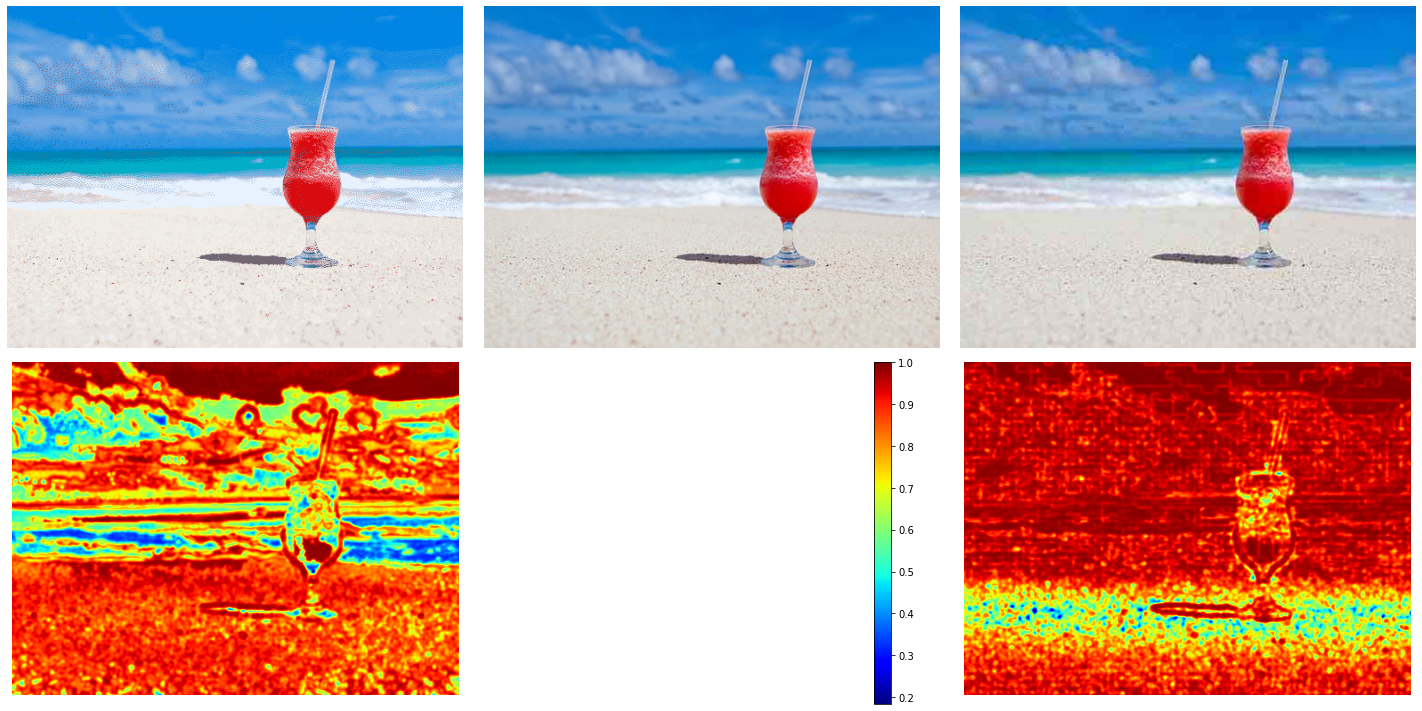

In [17]:
draw_per_pixel_ssim(I_1, I_2, I_ref)

# How SSIM is correlated to human perception?
----

In [18]:
tid2013 = "C:\\RESOURCES\\datasets\\tid2013"
ssim = []
with open(tid2013 + "\\metrics_values\\SSIM.txt") as f:
    for line in f:
        ssim.append(float(line))
ssim = np.array(ssim, dtype=np.float32)

Pearson(SSIM, MOS) = 0.6524
Spearman(SSIM, MOS) = 0.6368


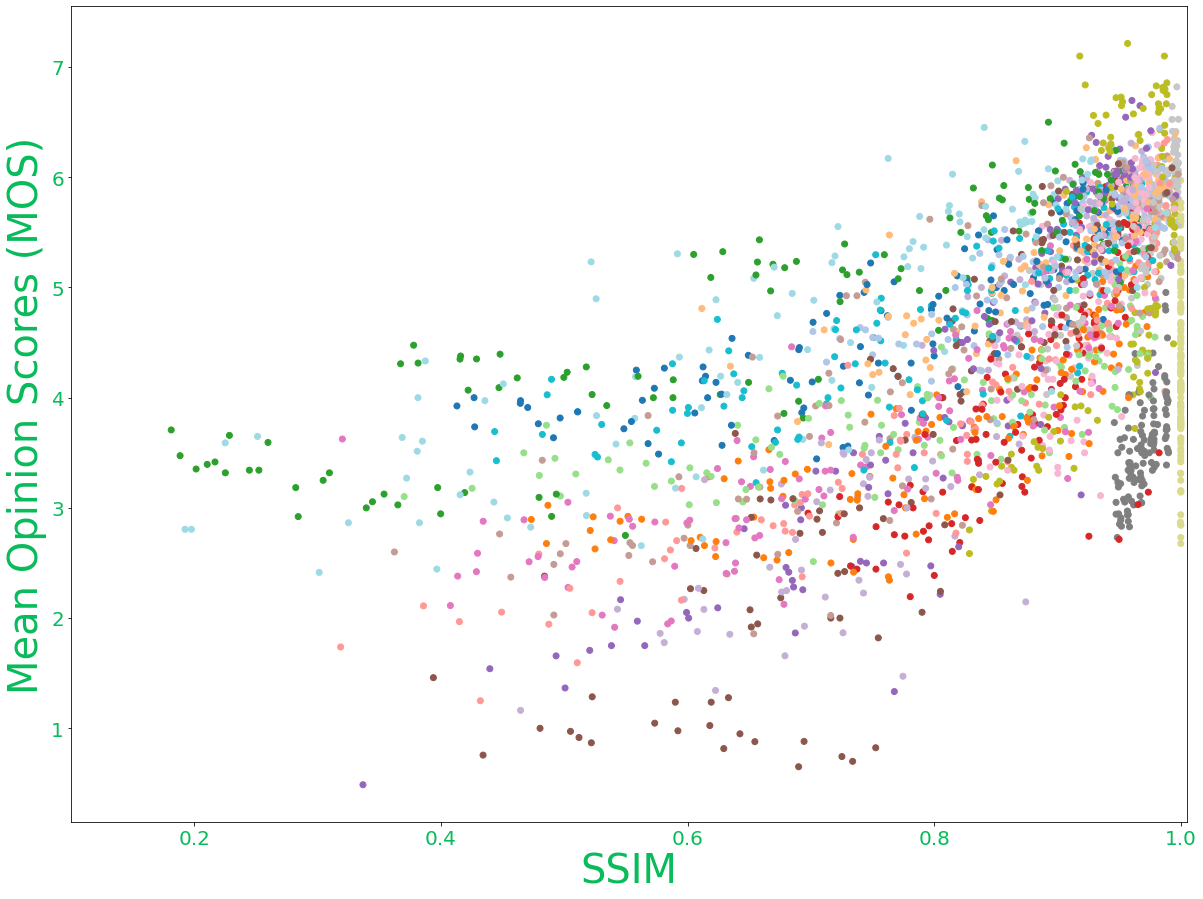

In [19]:
# colors = np.array(list(range(1, N_params + 1)) * (N_distortion * N_image)).flatten()  # 1 color / parameter
colors = np.array([[i] * N_params for i in range(N_distortion)] * N_image).flatten()  #1 color / distortion
idx = np.where(colors < 20)[0]
# idx = np.where(np.logical_or(colors == 9, colors == 10))[0]
# idx = range(len(colors))
print(f"Pearson(SSIM, MOS) = {pearson_cc(ssim, mos):1.4f}")
print(f"Spearman(SSIM, MOS) = {spearman_v1(ssim, mos):1.4f}")
draw_figure(ssim[idx], mos[idx], colors[idx], xlim=(0.1, 1.005), xlabel="SSIM")

# SSIM in theory
----
For each pixel $(i, j)$, we have:

$$\text{SSIM}(i, j) = l^\alpha(i, j) \cdot c^\beta(i, j) \cdot s^\gamma(i, j)$$

with:

$$\begin{gather}
    l(i, j) = \frac{2 \cdot \mu_\mathcal{I}(i, j) \ \mu_{\mathcal{I}_\text{ref}}(i, j) + C_1}{\mu_\mathcal{I}^2(i, j) + \mu_{\mathcal{I}_\text{ref}}^2(i, j) + C_1} \\~\\
    c(i, j) = \frac{2 \cdot \sigma_\mathcal{I}(i, j) \ \sigma_{\mathcal{I}_\text{ref}}(i, j) + C_2}{\sigma_\mathcal{I}^2(i, j) + \sigma_{\mathcal{I}_\text{ref}}^2(i, j) + C_2} \\~\\
    s(i, j) = \frac{\sigma_{\mathcal{I}, \mathcal{I}_\text{ref}}^2(i, j) + C_3}{\sigma_\mathcal{I}(i, j) \ \sigma_{\mathcal{I}_\text{ref}}(i, j) + C_3}
\end{gather}$$

where $\mu$ and $\sigma$ are the weighted mean and weighted (cross-)covariance of the neighborhood.

# SSIM in theory (2)
----

- Windowing approach to reduce "blocking effects" → filter with a Gaussian kernel
- Results in replacing local average (empirical estimator) by Gaussian filtering

For a $(2\cdot r + 1)$ neighborhood:

$$\begin{gather}
    \mu_\mathcal{I}(i, j) = \sum_{p=-r}^r \sum_{q=-r}^r w_{i,j} \cdot \mathcal{I}(i+p,j+q) \\
    \sigma_\mathcal{I}^2(i, j) = \left(\sum_{p=-r}^r \sum_{q=-r}^r w_{i,j} \cdot \mathcal{I}^2(i+p,j+q)\right) - \mu_\mathcal{I}^2(i, j) \\
    \sigma_{\mathcal{I}, \mathcal{I}_\text{ref}}^2(i, j) = \left(\sum_{p=-r}^r \sum_{q=-r}^r w_{i,j} \cdot \mathcal{I}(i+p,j+q) \ \mathcal{I}_\text{ref}(i+p,j+q)\right) - \mu_\mathcal{I}(i, j) \ \mu_{\mathcal{I}_\text{ref}}(i, j)
\end{gather}$$

# SSIM in practice
----
In practice, we use:
- use $\alpha = \beta = \gamma = 1$
- $C_1 = (k_1 \ L)^2$ with $k_1 = 0.01$ and $L=255$ (maximal luminance with 8bits coding)
- $C_2 = (k_2 \ L)^2$ with $k_2 = 0.03$
- $C_3 = \frac{C_2}{2}$

Which simplify the equation as follows:
$$\text{SSIM}(i, j) = \underbrace{\frac{2 \cdot \mu_\mathcal{I}(i, j) \ \mu_{\mathcal{I}_\text{ref}}(i, j) + C_1}{\mu_\mathcal{I}^2(i, j) + \mu_{\mathcal{I}_\text{ref}}^2(i, j) + C_1}}_{\text{Luminance}} \cdot \underbrace{\frac{2 \cdot \sigma_{\mathcal{I}, \mathcal{I}_\text{ref}}^2(i, j) + C_2}{\sigma_\mathcal{I}^2(i, j) + \sigma_{\mathcal{I}_\text{ref}}^2(i, j) + C_2}}_{\text{Contrast-Structure}}$$

# SSIM in practice (2)
----

<table>
<!--     Add  width="1500px" to increase image size -->
    <tr>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_06_04.png" width="100%"><figcaption><center>1</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07.png" width="100%"><figcaption><center>Reference</center></figcaption></figure></td>
        <td width="33%"><figure><img src="https://gitlab.com/pierre-jacob/am4ip/-/raw/main/resources/iqa/I07_10_03.png" width="100%"><figcaption><center>2</center></figcaption></figure></td>
    </tr>
</table>

In [20]:
def npy_to_torch(I):
    return torch.permute(torch.from_numpy(I[None, ...]), (0, 3, 1, 2))

def gaussian_filter(r, sigma, device="cuda:0", dtype=torch.float32):
    gaussian_filter_1d = torch.exp(-0.5*(torch.arange(-r, r+1, device=device, dtype=dtype)/sigma)**2)
    
    gaussian_filter_2d = gaussian_filter_1d.view(-1, 1) * gaussian_filter_1d.view(1, -1)
    gaussian_filter_2d = gaussian_filter_2d[None, None, ...] / gaussian_filter_2d.sum()
    
    
    return gaussian_filter_2d  # shape = (1, 1, 2r+1, 2r+1)

In [21]:
def calc_ssim(I, I_ref, r=5, sigma=1.5, max_value=255., k_1=0.01, k_2=0.03):
    images = torch.concat([I, I_ref], dim=0)  # shape = 2 x C x H x W
    
    c_1 = (k_1 * max_value) ** 2
    c_2 = (k_2 * max_value) ** 2
    
    gaussian_2d_filter = gaussian_filter(r, sigma, I.device, I.dtype).repeat((I.size(1), 1, 1, 1))

    mu = torch.conv2d(images, gaussian_2d_filter, padding="valid", groups=I.size(1))  # 2 x C x H x W
    cov = torch.conv2d(images**2, gaussian_2d_filter, padding="valid", groups=I.size(1)) - mu**2  # 2 x C x H x W
    cross_cov = torch.conv2d((images[0] * images[1]).unsqueeze(0),
                             gaussian_2d_filter, padding="valid", groups=I.size(1)).squeeze(0)  # C x H x W
    cross_cov -= mu[0] * mu[1]

    luminance = (2. * mu[0] * mu[1] + c_1) / (mu[0]**2 + mu[1]**2 + c_1)  # 3 x H x W
    contrast_struct = (2. * cross_cov + c_2) / (cov[0] + cov[1] + c_2)  # 3 x H x W

    ssim = torch.mean(luminance * contrast_struct)
    return ssim

In [22]:
I_ref = npy_to_torch(np.array(Image.open("../../resources/iqa/I07.png"), dtype=np.float32))
I_1 = npy_to_torch(np.array(Image.open("../../resources/iqa/I07_06_04.png"), dtype=np.float32))
I_2 = npy_to_torch(np.array(Image.open("../../resources/iqa/I07_10_03.png"), dtype=np.float32))
ssim_1 = calc_ssim(I_1, I_ref)
ssim_2 = calc_ssim(I_2, I_ref)

print(f"SSIM(I_1, I_ref) = {ssim_1:.2f} \t SSIM(I_2, I_ref) = {ssim_2:.2f}")

SSIM(I_1, I_ref) = 0.70 	 SSIM(I_2, I_ref) = 0.85


# Multi-Scale SSIM
----
- Human visual system is more sensitive to middle frequencies (*B. A. Wandell, Foundations of Vision, 1995*)
- MS-SSIM = SSIM applied to multiple scales, and correlated to MOS
<center>
    <img src="https://gitlab.com/am4ip/am4ip/-/raw/main/resources/iqa/ms_ssim.png?ref_type=heads"><caption>MS-SSIM pipeline</caption>
</center>
- L = low-pass filter
- 2↓ = Sub-sample by 2

# MS-SSIM in practice
----

$$\text{SSIM}_\text{MS}(i, j) = l_{M}^{\alpha_M}(i, j) \cdot \prod_{k=1}^M c_k^{\beta_k}(i, j) \cdot s_k^{\gamma_k}(i, j)$$

- Usual parameters:
    - M = 5
    - $\beta_1 = \gamma_1 = 0.0448$
    - $\beta_2 = \gamma_2 = 0.2856$
    - $\beta_3 = \gamma_3 = 0.3001$
    - $\beta_4 = \gamma_4 = 0.2363$
    - $\alpha_5 = \beta_5 = \gamma_5 = 0.1333$
- L + 2↓ = Average pooling with 2 x 2 kernel and stride (2,2)
- All $\beta_k = \gamma_k$ → Same formula as single scale for the contrast-structure term